<a href="https://colab.research.google.com/github/acse-moj20/msc-irp/blob/dev/Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dev Code (PredGAN) For Fluid Problem**

Setup and package import

In [2]:
%matplotlib inline
import sys
import os
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
print('Num of available GPUs: ', len(tf.config.list_physical_devices('GPU')))

Num of available GPUs:  0


## Data Analysis & Preparation

What we know so far:


*   Dataset represents the parameter values of u, v and p for 100 separate examples of the high fidelity solution.
*   Each example is computed over 50 timesteps and a on a 256-by-256 grid.



### Get Data from Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [16]:
data_dir = 'drive/MyDrive/MSC_IRP/data/vortex_100.npy'
data_file = np.load(data_dir)

In [31]:
data_0 = data_file[0]
data_final = data_file[-1]
print('Number of time steps: ', len(data_0))
print('Size of each timestep: ', data_0[0].shape)

Number of time steps:  50
Size of each timestep:  (256, 256, 3)


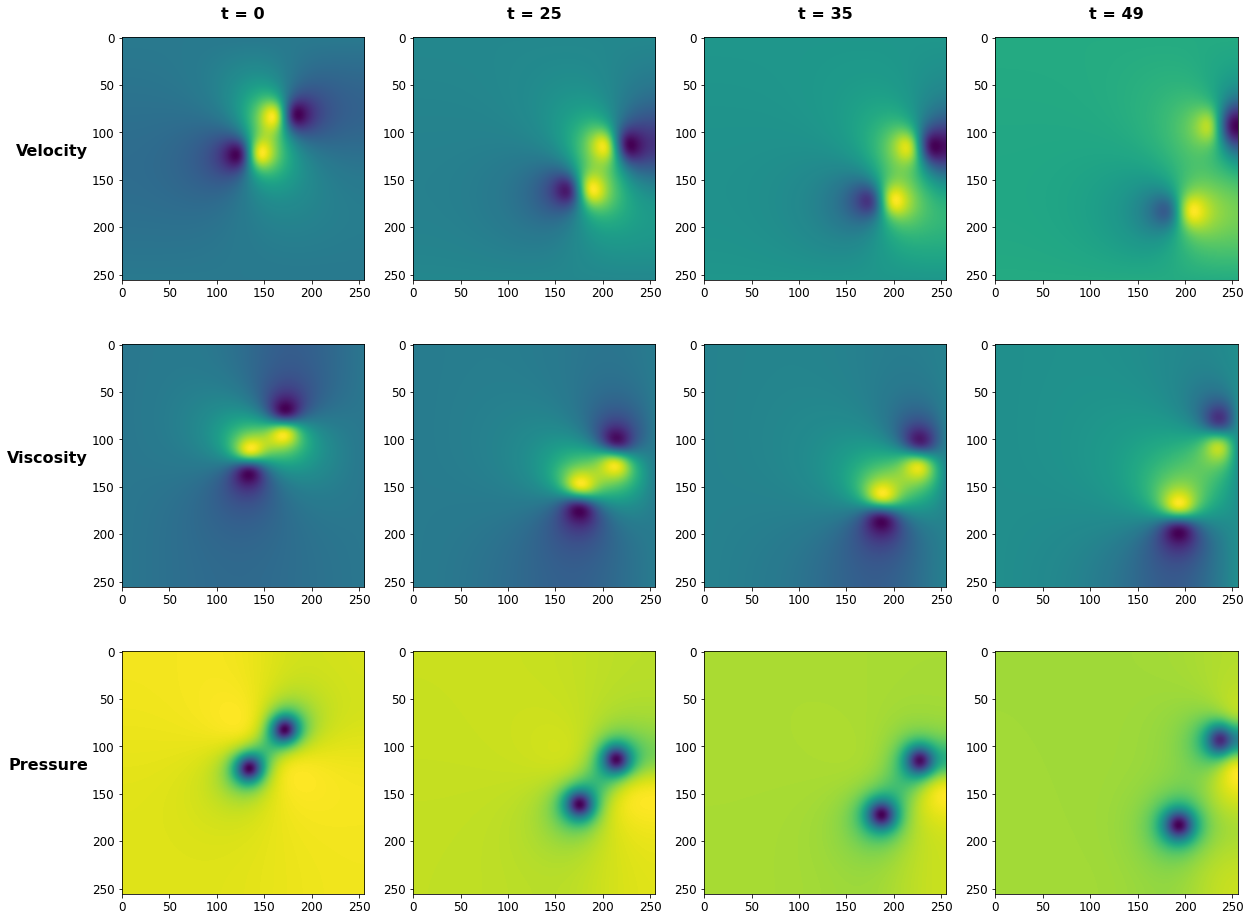

In [140]:
fig, ax = plt.subplots(3, 4, figsize=[20,16])
parameters = ['Velocity', 'Viscosity', 'Pressure']
times = [0, 25, 35, 49]
for i, step in enumerate(times):
  for j in range(len(parameters)):
    img = data_0[step][:, :, j]
    ax[j][i].imshow(img)
    if (i == 0):
      ax[j][i].set_ylabel(parameters[j], fontsize=16, fontweight='bold', 
                          rotation='horizontal', ha='right')
  ax.flatten()[i].set_title('t = {}'.format(step), y=1.05, 
                            fontsize=16, fontweight="bold")

plt.show()

### Data Preparation